In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency
from sklearn.preprocessing import StandardScaler

**Loading the Dataset**

In [ ]:
# file_path = '/content/covtype.data'
file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)

In [ ]:
data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
print(len(data[54].unique()), data[54].unique())

7 [5 2 1 7 3 6 4]


Drop NaN values (if any)

In [ ]:
data.dropna()

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3




---



**Adding column names to the dataset `covertype`**

In [ ]:
col_names_df = pd.read_csv("/content/drive/MyDrive/dataset-covertype/covertype-column-names.csv", header=None)

In [ ]:
# col_names_df[0]

In [ ]:
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


# Print column names
print(col_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Rawah_Wilderness_Area', 'Neota_Wilderness_Area', 'Comanche_Peak_Wilderness_Area', 'Cache_la_Poudre_Wilderness_Area', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type']


In [ ]:
data.columns=col_names
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
print(data.columns)
print(data.shape)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah_Wilderness_Area',
       'Neota_Wilderness_Area', 'Comanche_Peak_Wilderness_Area',
       'Cache_la_Poudre_Wilderness_Area', 'Soil_Type_1', 'Soil_Type_2',
       'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
       'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35',

In [ ]:
# data.iloc[row_idx][col_idx]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Rawah_Wilderness_Area               581012 non-null  int64
 11  Neota_Wilderness_Area               581012 non-null 

**Here, Checking for `NULL Values`**


In [ ]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Rawah_Wilderness_Area                 0
Neota_Wilderness_Area                 0
Comanche_Peak_Wilderness_Area         0
Cache_la_Poudre_Wilderness_Area       0
Soil_Type_1                           0
Soil_Type_2                           0
Soil_Type_3                           0
Soil_Type_4                           0
Soil_Type_5                           0
Soil_Type_6                           0
Soil_Type_7                           0
Soil_Type_8                           0
Soil_Type_9                           0
Soil_Type_10                          0
Soil_Type_11                          0


Normalize Data

In [ ]:
X = data.drop('Cover_Type', axis=1)
y = data['Cover_Type']

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



---



checking the correlation between the features

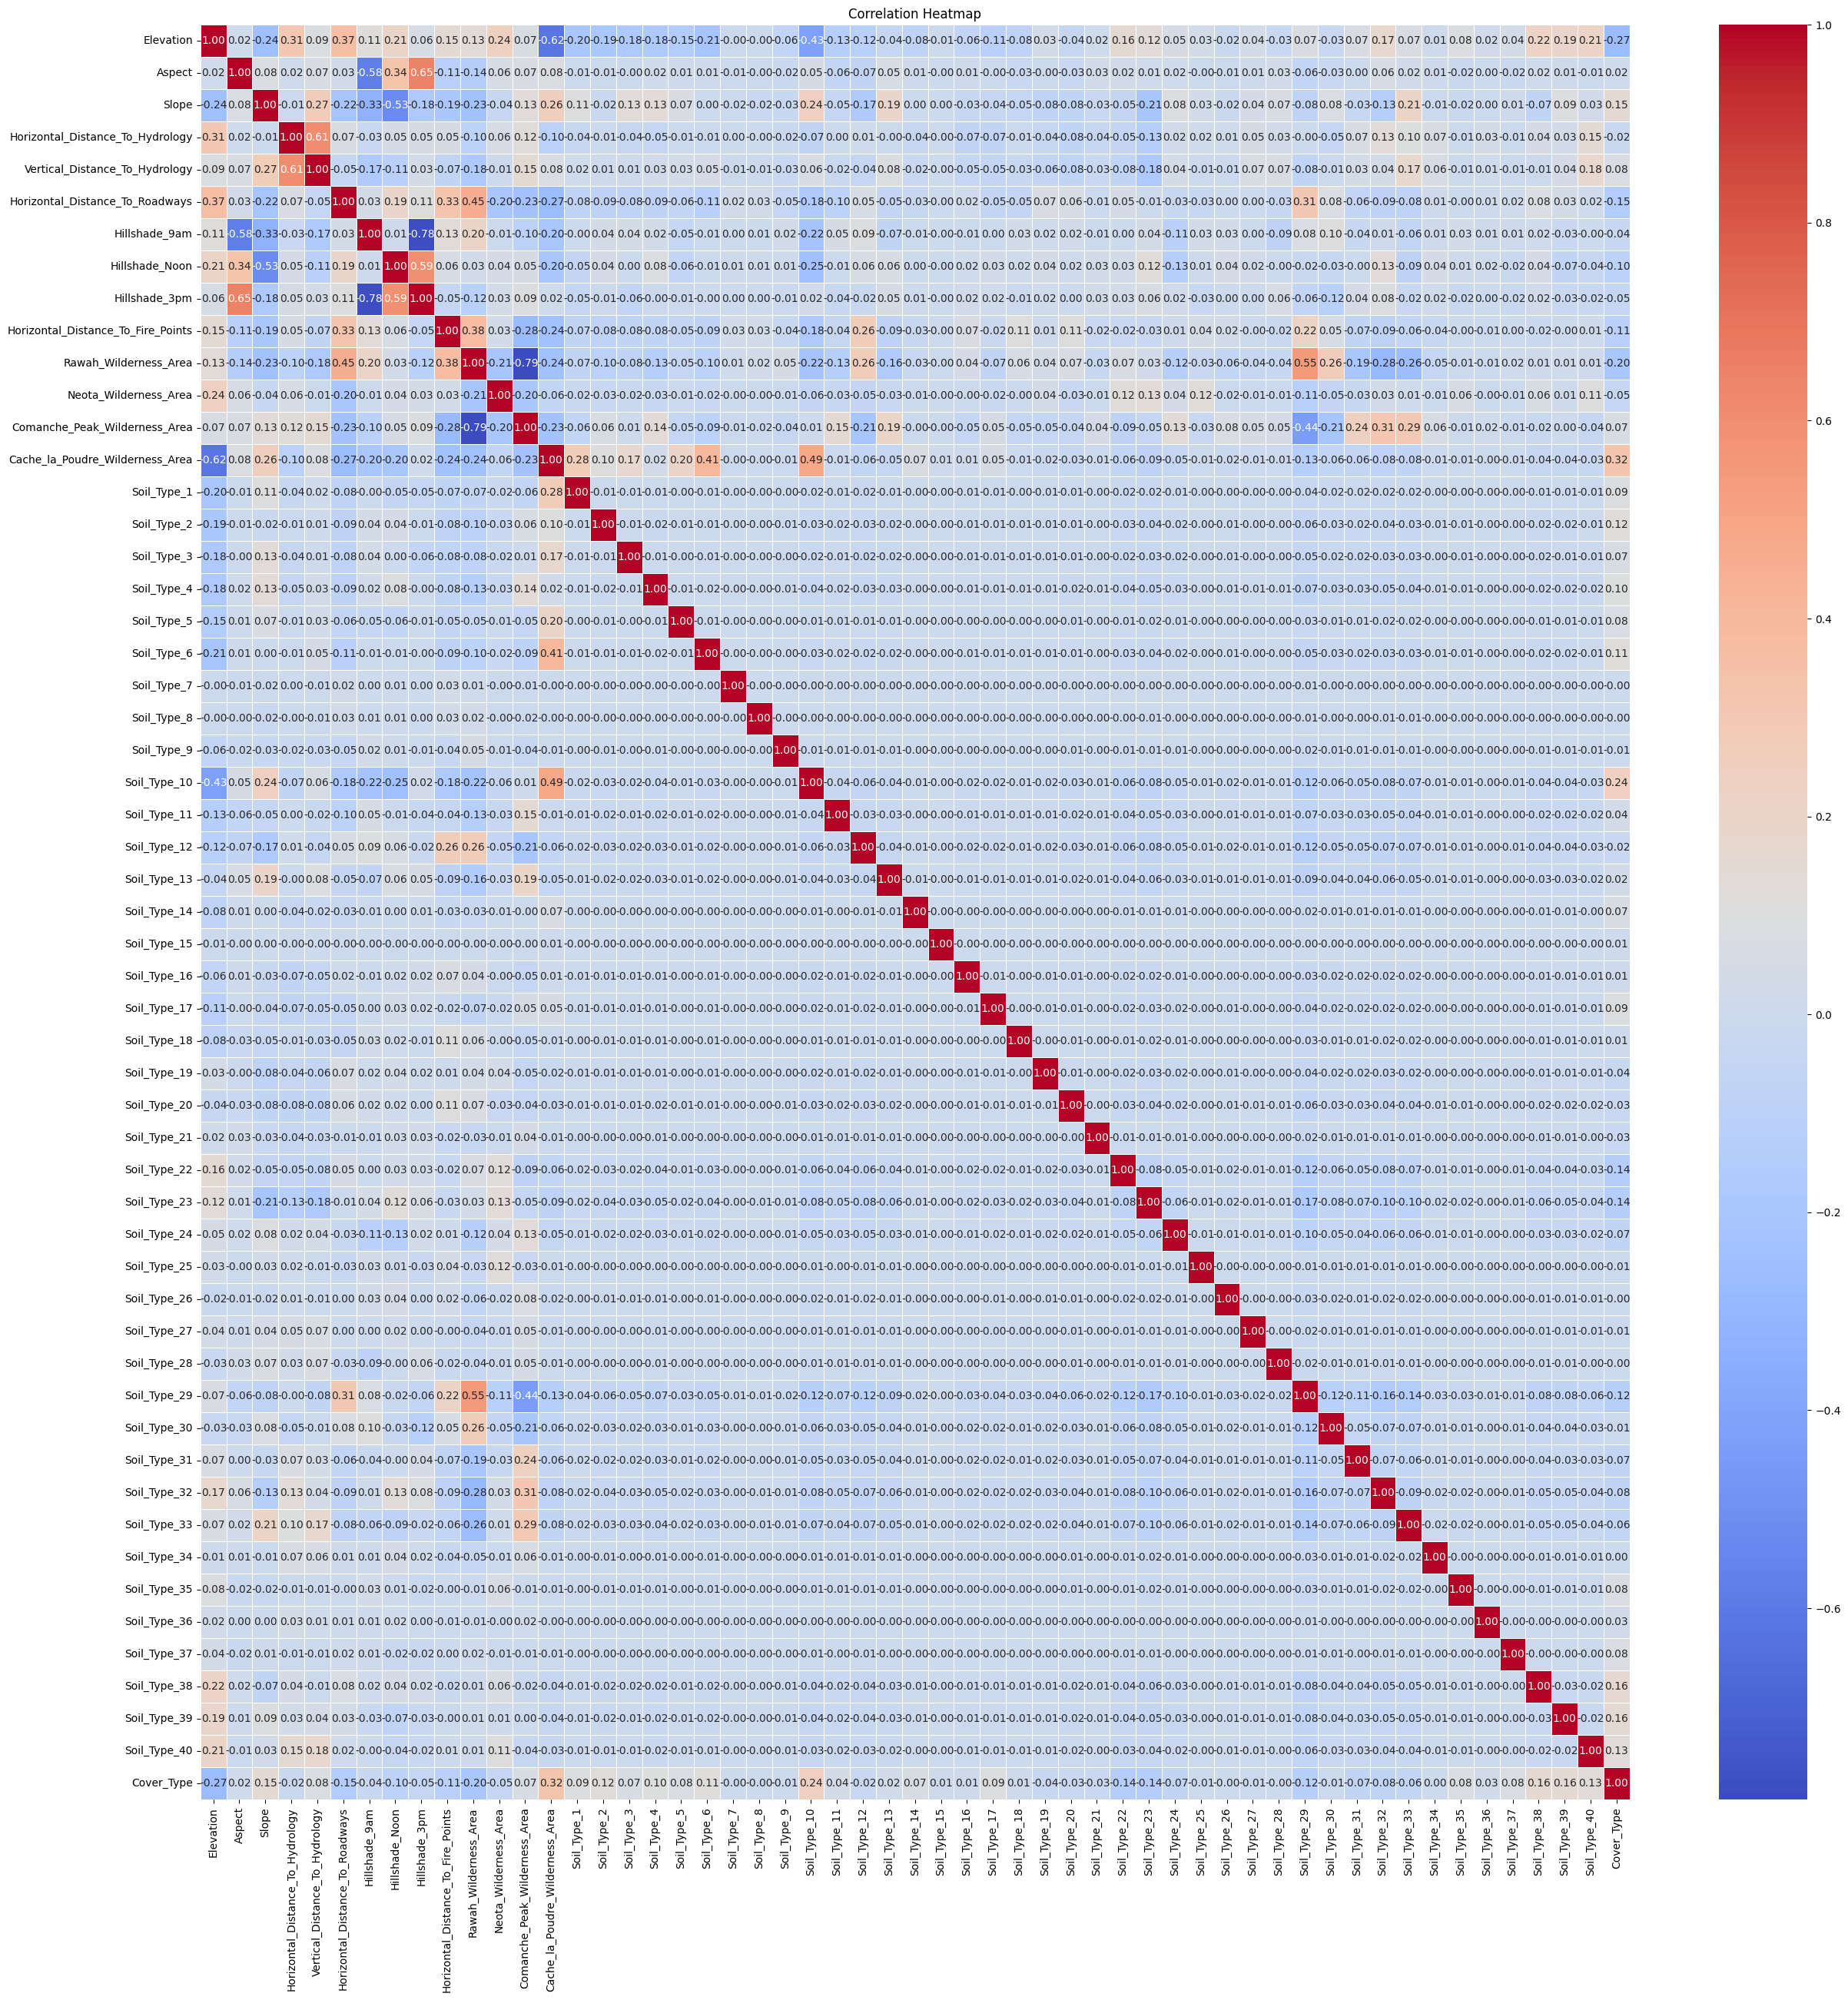

In [ ]:
correlation_matrix = data.corr(numeric_only = True)
plt.figure(figsize=(30, 30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()



---



# Hypothesis Testing

*Null Hypothesis: The attribute is not significant enough in the determination of the forest Cover Type*

Testing Function

In [ ]:
def hypothesis_test(p_value, testname, attribute):
  alpha = 0.05

  print('The p-value:', p_value)

  if p_value < alpha:
    if testname=='t':
      print('Reject the null hypothesis. There is a significant difference between the mean', attribute, 'of Cover Type 1 and Cover Type 2.')
    elif testname=='chi':
       print("Reject the null hypothesis. There is a significant relationship between", attribute, "and Cover_Type.")
  else:
    if testname=='t':
      print("Fail to reject the null hypothesis. There is no significant difference.")
    elif testname=='chi':
      print("Fail to reject the null hypothesis. There is no significant relationship.")



---



**t-Test**

In [ ]:
def small_sampletest(attribute):
  df_sample = data.sample(100)
  cover_type_1 = df_sample[df_sample['Cover_Type'] == 1][attribute]
  cover_type_2 = df_sample[df_sample['Cover_Type'] == 2][attribute]

  t_stat, p_value = stats.ttest_ind(cover_type_1, cover_type_2, equal_var=True)

  hypothesis_test(p_value, 't', attribute)

Evaluation 1: Check on larger set of samples

In [ ]:
def large_sampletest(attribute):
  df_sample = data.sample(10000)

  cover_type_1 = df_sample[df_sample['Cover_Type'] == 1][attribute]
  cover_type_2 = df_sample[df_sample['Cover_Type'] == 2][attribute]

  t_stat, p_value = stats.ttest_ind(cover_type_1, cover_type_2, equal_var=True)

  hypothesis_test(p_value, 't', attribute)

Evaluation 2 : Physically calculate the Difference in the means

In [ ]:
def find_diff(attribute):
  cover_type_1 = data[data['Cover_Type'] == 1][attribute]
  cover_type_2 = data[data['Cover_Type'] == 2][attribute]

  print('Mean for Cover Type 1:',cover_type_1.mean())
  print('Mean for Cover Type 2:',cover_type_2.mean())
  print('Difference in the Means:', abs(cover_type_1.mean() - cover_type_2.mean()))



---



**Chi-Squared test**

In [ ]:
def small_chitest(attribute):
  # Select a small portion of the data
  df_sample = data.sample(100)

  # Create a contingency table of Soil_Type vs. Cover_Type
  contingency_table = pd.crosstab(data[attribute], data['Cover_Type'])

  # Perform the chi-squared test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  hypothesis_test(p_value, 'chi', attribute)

Evaluation 1

In [ ]:
def large_chitest(attribute):
  #Larger Set of samples
  df_sample = data.sample(10000)

  # Create a contingency table of Soil_Type vs. Cover_Type
  contingency_table = pd.crosstab(data[attribute], data['Cover_Type'])

  # Perform the chi-squared test
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  hypothesis_test(p_value, 'chi', attribute)

Evaluation 2

In [ ]:
def correlation_score(attribute):
  correlation = data['Cover_Type'].corr(data[attribute])

  print(f"Correlation between 'Cover_Type' and '{attribute}': {correlation}")

Helper Function (Display All Necessary Details)

In [ ]:
def test_attribute(attribute):
  print('a) t-Test:\n')
  print('Small Sample Test:')
  small_sampletest(attribute)
  print()
  print('Validations:\n')
  print('1. Large Sample Test:')
  large_sampletest(attribute)
  print('\n2. Calculation of means across samples of the', attribute, 'attribute:')
  find_diff(attribute)
  print('-'*100)
  print('\nb) Chi-Squared Test:\n')
  print('Small Sample Test:')
  small_chitest(attribute)
  print()
  print('Validations:\n')
  print('1. Large Sample Test:')
  large_chitest(attribute)
  print('\n2. Calculation of the Correlation Coefficient:')
  correlation_score(attribute)



---



1. Test for the Elevation attribute

In [ ]:
attribute = 'Elevation'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 9.991834818547072e-09
Reject the null hypothesis. There is a significant difference between the mean Elevation of Cover Type 1 and Cover Type 2.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant difference between the mean Elevation of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Elevation attribute:
Mean for Cover Type 1: 3128.6448876510576
Mean for Cover Type 2: 2920.936060938719
Difference in the Means: 207.70882671233858
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Elevation and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Elevation and Cover_Type.

2. Calculation of the Correl

*Conclusion: Elevation is an important attribute for the determination of the cover type*



---



2. Test for the Aspect attribute

In [ ]:
attribute = 'Aspect'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.5852854983426998
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.02904640429202192
Reject the null hypothesis. There is a significant difference between the mean Aspect of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Aspect attribute:
Mean for Cover Type 1: 156.13822696374623
Mean for Cover Type 2: 152.06051514113963
Difference in the Means: 4.077711822606602
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Aspect and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Aspect and Cover_Type.

2. Calculation of the Correlation Coefficient:
Correlation between 'Cover_Type

*Conclusion: Aspect is an important attribute for the determination of the cover type*



---



3. Test for the Slope Attribute

In [ ]:
attribute = 'Slope'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.46550091546156513
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.012347844081238186
Reject the null hypothesis. There is a significant difference between the mean Slope of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Slope attribute:
Mean for Cover Type 1: 13.12711008308157
Mean for Cover Type 2: 13.550499292272177
Difference in the Means: 0.4233892091906064
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Slope and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Slope and Cover_Type.

2. Calculation of the Correlation Coefficient:
Correlation between 'Cover_Type' 

*Conclusion: Slope is an important attribute for the determination of the cover type*



---



4. Test for Horizontal_Distance_To_Hydrology attribute

In [ ]:
attribute = 'Horizontal_Distance_To_Hydrology'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.30891410277283676
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.13346241689842173
Fail to reject the null hypothesis. There is no significant difference.

2. Calculation of means across samples of the Horizontal_Distance_To_Hydrology attribute:
Mean for Cover Type 1: 270.5552445241692
Mean for Cover Type 2: 279.9164422292897
Difference in the Means: 9.361197705120503
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Horizontal_Distance_To_Hydrology and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Horizontal_Distance_To_Hydrology and Cover_Type.

2. Calculation of the Correlation Coefficient:
Co

*Conclusion: Horizontal_Distance_To_Hydrology is an important attribute for the determination of the cover type*



---



5. Test for Vertical_Distance_To_Hydrology attribute

In [ ]:
attribute = 'Vertical_Distance_To_Hydrology'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.8799247737581575
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 1.6250899207041254e-09
Reject the null hypothesis. There is a significant difference between the mean Vertical_Distance_To_Hydrology of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Vertical_Distance_To_Hydrology attribute:
Mean for Cover Type 1: 42.15693919939577
Mean for Cover Type 2: 45.88421855199946
Difference in the Means: 3.727279352603688
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Vertical_Distance_To_Hydrology and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Vertical_Distance_To_Hydrolog

*Conclusion: Vertical_Distance_To_Hydrology is an important attribute for the determination of the cover type*



---



6. Test for Horizontal_Distance_To_Roadways attribute

In [ ]:
attribute = 'Horizontal_Distance_To_Roadways'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.5019336358054227
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 2.0890638995638156e-05
Reject the null hypothesis. There is a significant difference between the mean Horizontal_Distance_To_Roadways of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Horizontal_Distance_To_Roadways attribute:
Mean for Cover Type 1: 2614.834516616314
Mean for Cover Type 2: 2429.530799397108
Difference in the Means: 185.3037172192062
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Horizontal_Distance_To_Roadways and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Horizontal_Distance_To_Roa

*Conclusion: Horizontal_Distance_To_Roadways is an important attribute for the determination of the cover type*



---



7. Test for Hillshade_9am attribute

In [ ]:
attribute = 'Hillshade_9am'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.19161479685520197
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.00027132781148394853
Reject the null hypothesis. There is a significant difference between the mean Hillshade_9am of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Hillshade_9am attribute:
Mean for Cover Type 1: 211.99878209969788
Mean for Cover Type 2: 213.84442342243761
Difference in the Means: 1.8456413227397377
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Hillshade_9am and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Hillshade_9am and Cover_Type.

2. Calculation of the Correlation Coefficient

Conclusion: Hillshade_9am is an important attribute for the determination of the cover type



---



8. Test for Hillshade_Noon attribute

In [ ]:
attribute = 'Hillshade_Noon'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.46542253095688546
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 3.900131303553338e-09
Reject the null hypothesis. There is a significant difference between the mean Hillshade_Noon of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Hillshade_Noon attribute:
Mean for Cover Type 1: 223.43021148036254
Mean for Cover Type 2: 225.3265960939072
Difference in the Means: 1.8963846135446545
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Hillshade_Noon and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Hillshade_Noon and Cover_Type.

2. Calculation of the Correlation Coefficie

*Conclusion: Hillshade_Noon is an important attribute for the determination of the cover type*



---



9. Test for Hillshade_3pm attribute

In [ ]:
attribute = 'Hillshade_3pm'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.38260019291473346
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.570109671699085
Fail to reject the null hypothesis. There is no significant difference.

2. Calculation of means across samples of the Hillshade_3pm attribute:
Mean for Cover Type 1: 143.87503776435045
Mean for Cover Type 2: 142.9834663485127
Difference in the Means: 0.8915714158377455
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Hillshade_3pm and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Hillshade_3pm and Cover_Type.

2. Calculation of the Correlation Coefficient:
Correlation between 'Cover_Type' and 'Hillshade_3pm': -0.04

*Conclusion: Hillshade_3pm is an important attribute for the determination of the cover type*



---



10. Test for Horizontal_Distance_To_Fire_Points attribute

In [ ]:
attribute = 'Horizontal_Distance_To_Fire_Points'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.6024463498495882
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 2.436259899381043e-09
Reject the null hypothesis. There is a significant difference between the mean Horizontal_Distance_To_Fire_Points of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Horizontal_Distance_To_Fire_Points attribute:
Mean for Cover Type 1: 2009.2535168051359
Mean for Cover Type 2: 2168.154849435759
Difference in the Means: 158.90133263062307
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Horizontal_Distance_To_Fire_Points and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Horizontal_Dista

*Conclusion: Horizontal_Distance_To_Fire_Points is an important attribute for the determination of the cover type*



---



11. Test for Rawah_Wilderness_Area attribute

In [ ]:
attribute = 'Rawah_Wilderness_Area'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.6773721961042802
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.5112112704226304
Fail to reject the null hypothesis. There is no significant difference.

2. Calculation of means across samples of the Rawah_Wilderness_Area attribute:
Mean for Cover Type 1: 0.49904172960725074
Mean for Cover Type 2: 0.5160483019826968
Difference in the Means: 0.01700657237544606
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Rawah_Wilderness_Area and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Rawah_Wilderness_Area and Cover_Type.

2. Calculation of the Correlation Coefficient:
Correlation between 'Cover_Type'

*Conclusion: Rawah_Wilderness_Area is an important attribute for the determination of the cover type*



---



12. Test for Neota_Wilderness_Area attribute

In [ ]:
attribute = 'Neota_Wilderness_Area'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.9556841869161246
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 1.0996368068303477e-20
Reject the null hypothesis. There is a significant difference between the mean Neota_Wilderness_Area of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Neota_Wilderness_Area attribute:
Mean for Cover Type 1: 0.08777851208459214
Mean for Cover Type 2: 0.03171538399087896
Difference in the Means: 0.05606312809371318
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Neota_Wilderness_Area and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Neota_Wilderness_Area and Cover_Type.

2. Calculat

*Conclusion: Neota_Wilderness_Area is an important attribute for the determination of the cover type*



---



13. Test for Comanche_Peak_Wilderness_Area attribute

In [ ]:
attribute = 'Comanche_Peak_Wilderness_Area'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: 0.5627417878524629
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 0.05220281112022184
Fail to reject the null hypothesis. There is no significant difference.

2. Calculation of means across samples of the Comanche_Peak_Wilderness_Area attribute:
Mean for Cover Type 1: 0.4131797583081571
Mean for Cover Type 2: 0.44155509511085383
Difference in the Means: 0.028375336802696716
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Comanche_Peak_Wilderness_Area and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Comanche_Peak_Wilderness_Area and Cover_Type.

2. Calculation of the Correlation Coefficient:
Correl

*Conclusion: Comanche_Peak_Wilderness_Area is an important attribute for the determination of the cover type*



---



14. Test for Cache_la_Poudre_Wilderness_Area attribute

In [ ]:
attribute = 'Cache_la_Poudre_Wilderness_Area'

test_attribute(attribute)

a) t-Test:

Small Sample Test:
The p-value: nan
Fail to reject the null hypothesis. There is no significant difference.

Validations:

1. Large Sample Test:
The p-value: 1.2537231316872282e-09
Reject the null hypothesis. There is a significant difference between the mean Cache_la_Poudre_Wilderness_Area of Cover Type 1 and Cover Type 2.

2. Calculation of means across samples of the Cache_la_Poudre_Wilderness_Area attribute:
Mean for Cover Type 1: 0.0
Mean for Cover Type 2: 0.010681218915570365
Difference in the Means: 0.010681218915570365
----------------------------------------------------------------------------------------------------

b) Chi-Squared Test:

Small Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Cache_la_Poudre_Wilderness_Area and Cover_Type.

Validations:

1. Large Sample Test:
The p-value: 0.0
Reject the null hypothesis. There is a significant relationship between Cache_la_Poudre_Wilderness_Area and Cover_Type.



*Conclusion: Cache_la_Poudre_Wilderness_Area is an important attribute for the determination of the cover type*



---



# Exploratory Data Analysis (EDA)

# Outliers


we check for extreme outliers so as to keep the maximum rows.
we defiune extreme outliers as:


*   x < first quartile - 3 * Interquartile Range
*   x > Q3 + 3 * Interquartile Range

In [ ]:
def outlieeeer(df, col_name):
    #  we get the upp lim and the low lim after which we will get outliers here

    Q1 = np.percentile(np.array(df[col_name].tolist()), 25)
    Q3 = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = Q3 - Q1

    upp_lim = Q3+(3*IQR)
    low_lim = Q1-(3*IQR)
    no_of_outliers=0

    for x in df[col_name].tolist():
        if (x < low_lim) or (x > upp_lim):
            no_of_outliers+=1
    return low_lim, upp_lim, no_of_outliers

In [ ]:
cur= 0
nam="Elevation"

In [ ]:
for col in data.columns:
        print(str( outlieeeer(data,col)[2])+" outliers in "+str(col))
        if( cur<outlieeeer(data,col)[2]):
          cur=outlieeeer(data,col)[2]
          nam=col

0 outliers in Elevation
0 outliers in Aspect
275 outliers in Slope
414 outliers in Horizontal_Distance_To_Hydrology
5339 outliers in Vertical_Distance_To_Hydrology
0 outliers in Horizontal_Distance_To_Roadways
1027 outliers in Hillshade_9am
1191 outliers in Hillshade_Noon
0 outliers in Hillshade_3pm
10 outliers in Horizontal_Distance_To_Fire_Points
0 outliers in Rawah_Wilderness_Area
29884 outliers in Neota_Wilderness_Area
0 outliers in Comanche_Peak_Wilderness_Area
36968 outliers in Cache_la_Poudre_Wilderness_Area
3031 outliers in Soil_Type_1
7525 outliers in Soil_Type_2
4823 outliers in Soil_Type_3
12396 outliers in Soil_Type_4
1597 outliers in Soil_Type_5
6575 outliers in Soil_Type_6
105 outliers in Soil_Type_7
179 outliers in Soil_Type_8
1147 outliers in Soil_Type_9
32634 outliers in Soil_Type_10
12410 outliers in Soil_Type_11
29971 outliers in Soil_Type_12
17431 outliers in Soil_Type_13
599 outliers in Soil_Type_14
3 outliers in Soil_Type_15
2845 outliers in Soil_Type_16
3422 outl

In [ ]:
cur

115247

In [ ]:
nam

'Soil_Type_29'

### therfore the maximum outliers are in the column Soil_Type_29 and are 115247 in number

In [ ]:
cur

115247

In [ ]:
data.shape

(581012, 55)

In [ ]:
(cur/data.shape[0]) * 100

19.83556277667243

therefore 19.84% of the data lies in the extreme outlier range

In [ ]:
# we are gonna check if Wilderness_Area and Soil_Type columns have binary values only

In [ ]:
is_binary_columns = [column for column in data.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(data[is_binary_columns].values.ravel())

array([1, 0])

In [ ]:
# we are gonna check if Wilderness_Area and Soil_Type columns have binary values only

In [ ]:
is_binary_columns = [column for column in data.columns if ("Wilderness" in column) | ("Soil" in column)]
pd.unique(data[is_binary_columns].values.ravel())

array([1, 0])

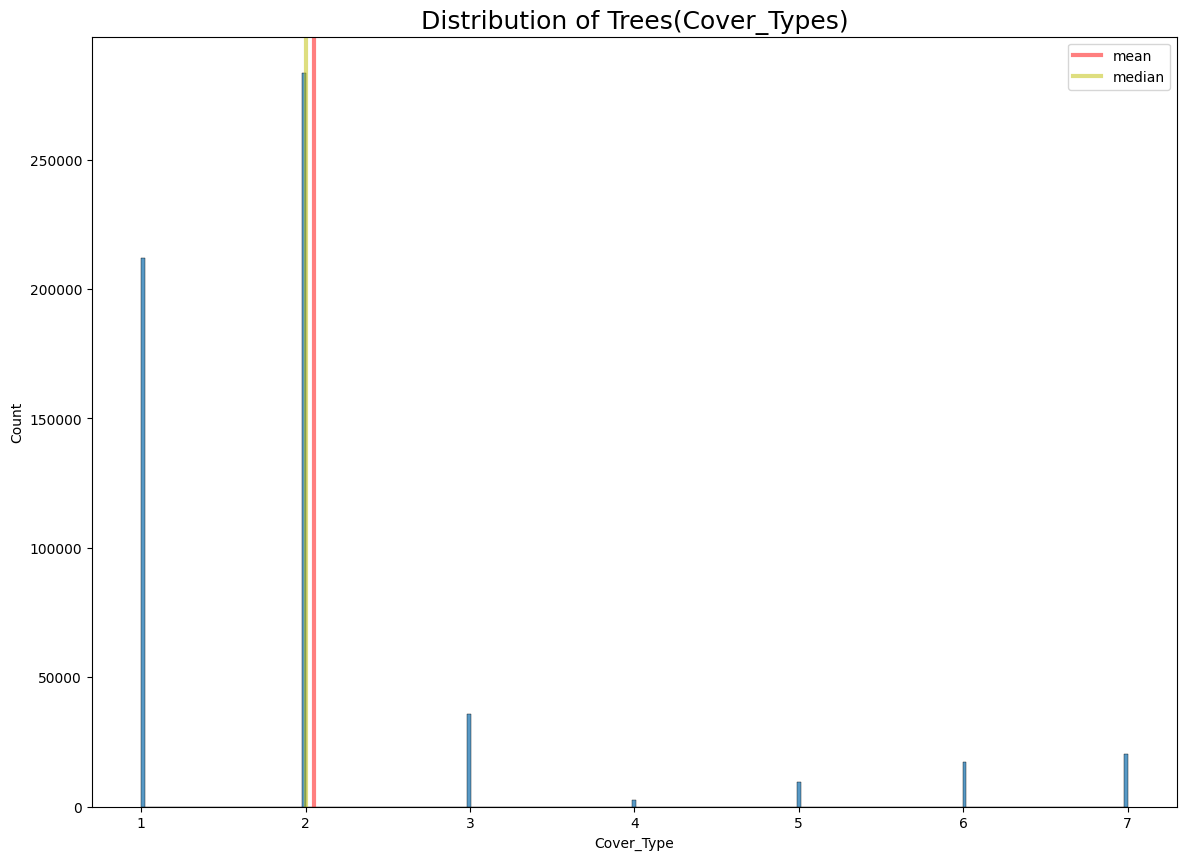

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# histogram
sns.histplot(data["Cover_Type"])

#adding mean and median lines
plt.axvline(x=data["Cover_Type"].mean(), linewidth=3, color='r', label="mean", alpha=0.5)
plt.axvline(x=data["Cover_Type"].median(), linewidth=3, color='y', label="median", alpha=0.5)


plt.xlabel("Cover_Type")
plt.ylabel("Count")
plt.title("Distribution of Trees(Cover_Types)", size=18)
plt.legend(["mean", "median"])
plt.show()


In [ ]:
data["Cover_Type"].mean()

2.051470537613681

In [ ]:
data["Cover_Type"].median()

2.0

## 7 types of the trees, numbered from 1 to 7 in the Cover_Type column:

1) Spruce/Fir

2) Lodgepole Pine

3) Ponderosa Pine

4) Cottonwood/Willow

5) Aspen

6) Douglas-fir

7) Krummholz

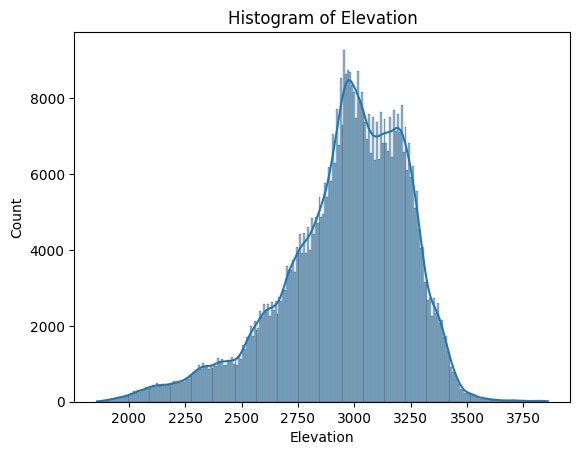

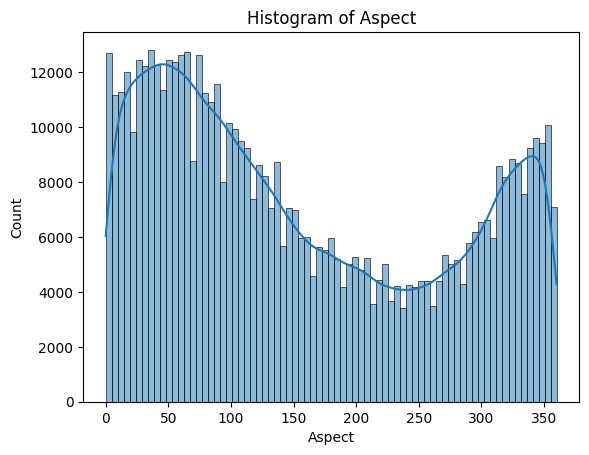

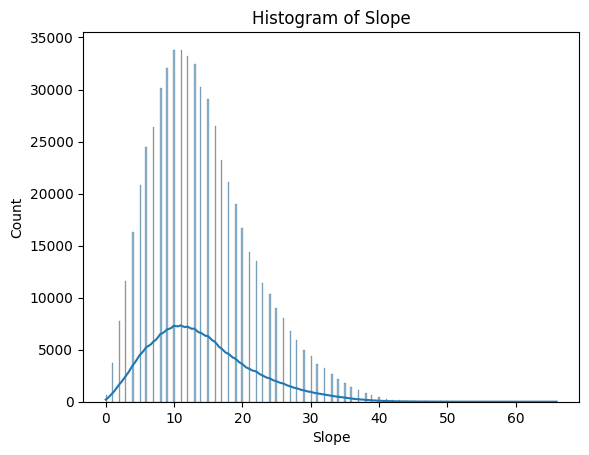

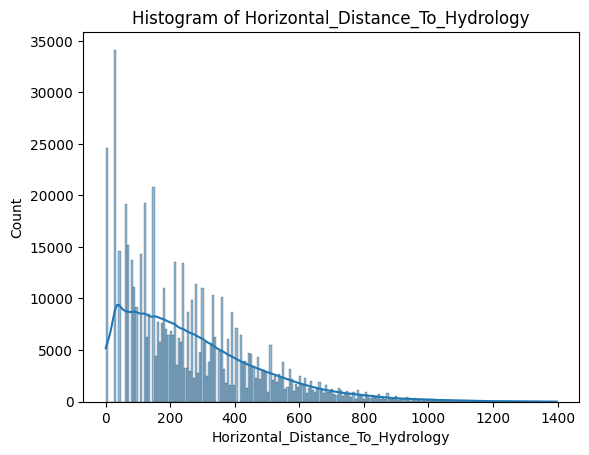

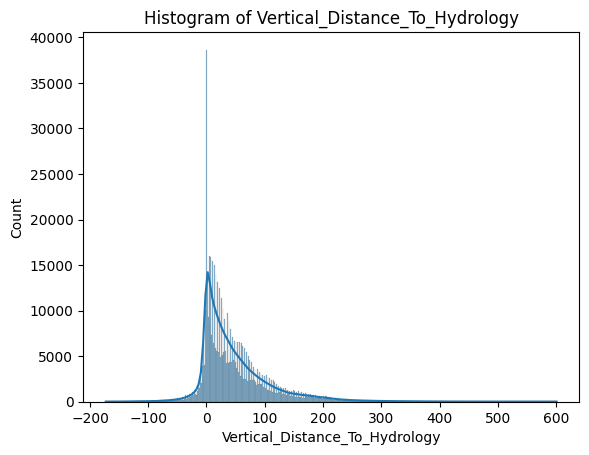

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# histograms
numerical_features = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology']
for f in numerical_features:
    sns.histplot(data[f], kde=True)
    plt.title(f'Histogram of {f}')
    plt.show()


In [ ]:
class_distribution = data['Cover_Type'].value_counts()
print("Class Distribution:")
print(class_distribution)


Class Distribution:
2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64


Correlation Analysis

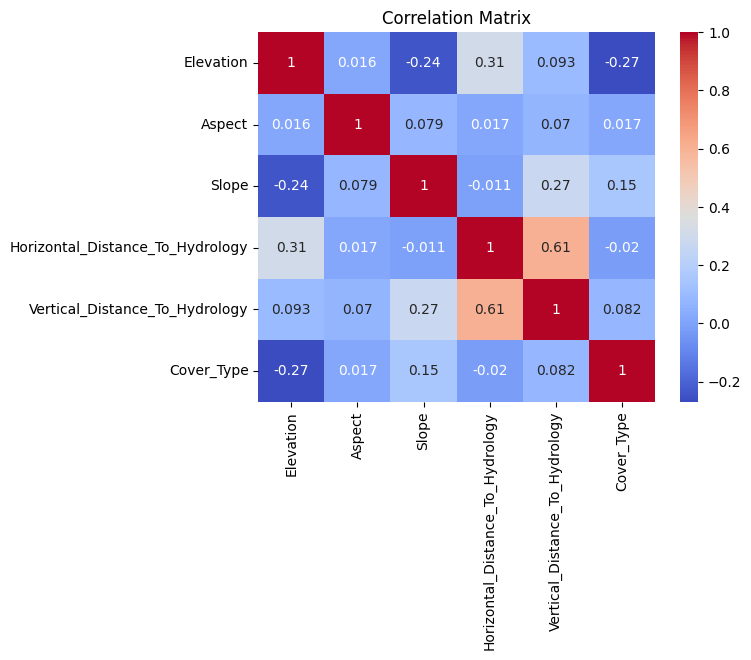

In [ ]:
# correlation matrix
correlation_matrix = data[numerical_features + ['Cover_Type']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


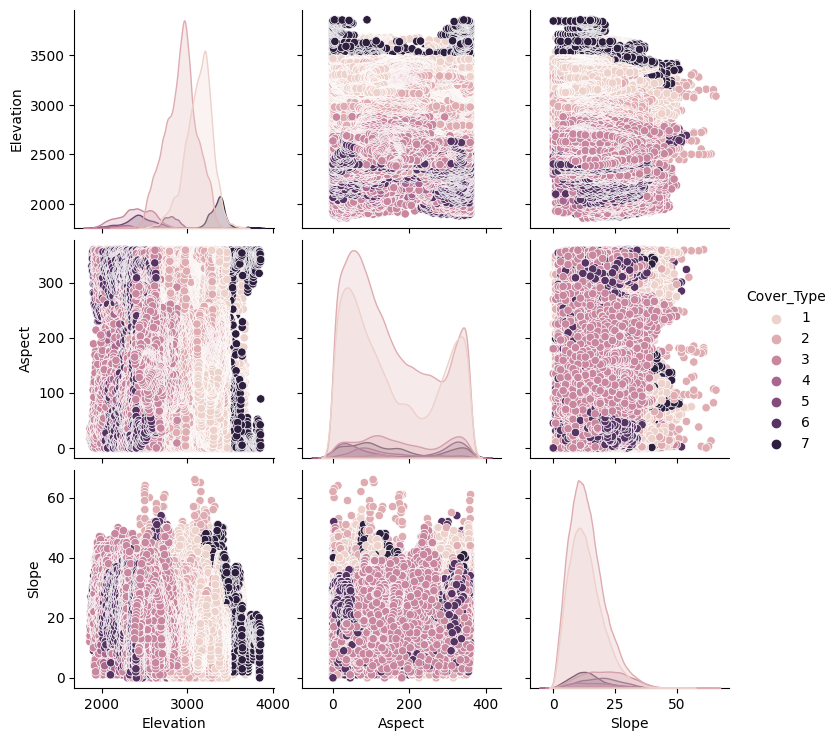

In [ ]:
# Pair plots
selected_features = ['Elevation', 'Aspect', 'Slope', 'Cover_Type']
sns.pairplot(data[selected_features], hue='Cover_Type', diag_kind='kde')
plt.show()


# **After** Mid_term Presentations


In [ ]:
file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


# Print column names
print(col_names)

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Rawah_Wilderness_Area', 'Neota_Wilderness_Area', 'Comanche_Peak_Wilderness_Area', 'Cache_la_Poudre_Wilderness_Area', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Soil_Type_40', 'Cover_Type']


In [ ]:
data.columns=col_names
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [ ]:
print(data.columns)
print(data.shape)

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points', 'Rawah_Wilderness_Area',
       'Neota_Wilderness_Area', 'Comanche_Peak_Wilderness_Area',
       'Cache_la_Poudre_Wilderness_Area', 'Soil_Type_1', 'Soil_Type_2',
       'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6',
       'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10',
       'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14',
       'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18',
       'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22',
       'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26',
       'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30',
       'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34',
       'Soil_Type_35',

In [ ]:
df= data

# li of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

# Display the updated dataframe
print(df.head())


In [ ]:
print(df.loc[0])

Elevation                             2596
Aspect                                  51
Slope                                    3
Horizontal_Distance_To_Hydrology       258
Vertical_Distance_To_Hydrology           0
Horizontal_Distance_To_Roadways        510
Hillshade_9am                          221
Hillshade_Noon                         232
Hillshade_3pm                          148
Horizontal_Distance_To_Fire_Points    6279
Rawah_Wilderness_Area                    1
Neota_Wilderness_Area                    0
Comanche_Peak_Wilderness_Area            0
Cache_la_Poudre_Wilderness_Area          0
Soil_Type_1                              0
Soil_Type_2                              0
Soil_Type_3                              0
Soil_Type_4                              0
Soil_Type_5                              0
Soil_Type_6                              0
Soil_Type_7                              0
Soil_Type_8                              0
Soil_Type_9                              0
Soil_Type_1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")



Random Forest Accuracy: 0.96


In [ ]:
# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame

df= data

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")


KNN Accuracy: 0.97


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))




# Assuming 'df' is your DataFrame
df=data

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Logistic Regression model
logreg_model = LogisticRegression(max_iter=10000000, random_state=42)

# Train the model
logreg_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
logreg_predictions = logreg_model.predict(X_test_scaled)

# Evaluate the model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
print(f"Logistic Regression Accuracy: {logreg_accuracy:.2f}")


Logistic Regression Accuracy: 0.72


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))




# Assuming 'df' is your DataFrame
df=data

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (important for some models)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")

Decision Tree Accuracy: 0.94


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with features and target variable 'Cover_Type'

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)
y = df['Cover_Type']

# Convert labels to start from 0
y = y - 1

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (important for neural networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One-hot encode the class labels
y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

# Create a neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(7, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train_one_hot, epochs=10, batch_size=32, validation_split=0.2, verbose=2)

# Predict probabilities for each class
nn_probabilities = model.predict(X_test_scaled)

# Get predicted classes
nn_predictions = np.argmax(nn_probabilities, axis=1) + 1  # Add 1 to predictions to restore original labels

# Evaluate the model on the test set
nn_accuracy = accuracy_score(y_test, nn_predictions)
print(f"Neural Network Accuracy: {nn_accuracy:.2f}")


Epoch 1/10
11621/11621 - 29s - loss: 0.5319 - accuracy: 0.7712 - val_loss: 0.4483 - val_accuracy: 0.8116 - 29s/epoch - 2ms/step
Epoch 2/10
11621/11621 - 26s - loss: 0.4235 - accuracy: 0.8206 - val_loss: 0.3961 - val_accuracy: 0.8339 - 26s/epoch - 2ms/step
Epoch 3/10
11621/11621 - 27s - loss: 0.3802 - accuracy: 0.8394 - val_loss: 0.3622 - val_accuracy: 0.8491 - 27s/epoch - 2ms/step
Epoch 4/10
11621/11621 - 26s - loss: 0.3534 - accuracy: 0.8523 - val_loss: 0.3475 - val_accuracy: 0.8575 - 26s/epoch - 2ms/step
Epoch 5/10
11621/11621 - 27s - loss: 0.3353 - accuracy: 0.8606 - val_loss: 0.3385 - val_accuracy: 0.8604 - 27s/epoch - 2ms/step
Epoch 6/10
11621/11621 - 32s - loss: 0.3206 - accuracy: 0.8671 - val_loss: 0.3079 - val_accuracy: 0.8755 - 32s/epoch - 3ms/step
Epoch 7/10
11621/11621 - 32s - loss: 0.3099 - accuracy: 0.8726 - val_loss: 0.3093 - val_accuracy: 0.8723 - 32s/epoch - 3ms/step
Epoch 8/10
11621/11621 - 25s - loss: 0.3010 - accuracy: 0.8764 - val_loss: 0.3018 - val_accuracy: 0.8768

In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

# df.head()

# Extract features and target variable
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with features and target variable 'Cover_Type'

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)
y = df['Cover_Type']

# Convert labels to start from 0
y = y - 1

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the ExtraTreesClassifier model
xrf_classifier = ExtraTreesClassifier(random_state=42, ma)  # You can customize hyperparameters here

# Fit the model on the training data
xrf_classifier.fit(X_train, y_train)

# Predictions on the validation set
xrf_predictions = xrf_classifier.predict(X_valid)

# Evaluate the model
xrf_accuracy = accuracy_score(y_valid, xrf_predictions)
print("Accuracy of the ExtraTreesClassifier model:", xrf_accuracy)

Accuracy of the ExtraTreesClassifier model: 0.9526604304536027


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

# df.head()
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with features and target variable 'Cover_Type'

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)
y = df['Cover_Type']

# Convert labels to start from 0
y = y - 1

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the input features (important for LightGBM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# Create the LGBMClassifier model
lgbm_classifier = LGBMClassifier(random_state=42)  # You can customize hyperparameters here

# Fit the model on the training data
lgbm_classifier.fit(X_train_scaled, y_train)

# Predictions on the validation set
lgbm_predictions = lgbm_classifier.predict(X_valid_scaled)

# Evaluate the model
lgbm_accuracy = accuracy_score(y_valid, lgbm_predictions)
print("Accuracy of the LGBMClassifier model:", lgbm_accuracy)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.138500 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2144
[LightGBM] [Info] Number of data points in the train set: 464809, number of used features: 53
[LightGBM] [Info] Start training from score -1.010055
[LightGBM] [Info] Start training from score -0.717554
[LightGBM] [Info] Start training from score -2.787067
[LightGBM] [Info] Start training from score -5.343669
[LightGBM] [Info] Start training from score -4.126990
[LightGBM] [Info] Start training from score -3.511322
[LightGBM] [Info] Start training from score -3.338569
Accuracy of the LGBMClassifier model: 0.8570260664526733


In [ ]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization


file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Assuming 'df' is your DataFrame with features and target variable 'Cover_Type'

# Extract features and target variable
X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)
y = df['Cover_Type']

# Convert labels to start from 0
y = y - 1

# Split the dataset into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the XGBClassifier model
xgb_classifier = XGBClassifier(random_state=42)  # You can customize hyperparameters here

# Fit the model on the training data
xgb_classifier.fit(X_train, y_train)

# Predictions on the validation set
xgb_predictions = xgb_classifier.predict(X_valid)

# Evaluate the model
xgb_accuracy = accuracy_score(y_valid, xgb_predictions)
print("Accuracy of the XGBClassifier model:", xgb_accuracy)



Accuracy of the XGBClassifier model: 0.8711823274786366


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models

knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.97


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models

knn_model = KNeighborsClassifier(n_neighbors=7)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.97


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models

knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.96


In [ ]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
# k-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

file_path = '/content/drive/MyDrive/DSC_proj/dataset-covertype/covtype.data.gz'

# file_path = '/content/drive/MyDrive/dataset-covertype/covtype.data.gz' #Drive method

data = pd.read_csv(file_path, header=None)
col_names_df = pd.read_csv("/content/drive/MyDrive/DSC_proj/dataset-covertype/covertype-column-names.csv", header=None)
col_names = []

for idx in range(0, len(col_names_df[0])):
  # print(idx)
  col_names.append(col_names_df[0][idx])


data.columns=col_names


import pandas as pd

df= data

# Assuming your dataframe is named 'df'
# Create a list of Soil_Type columns
soil_type_columns = [f'Soil_Type_{i}' for i in range(1, 41)]

# Reverse one-hot encoding
df['Reversed_Soil_Type'] = df[soil_type_columns].idxmax(axis=1).apply(lambda x: int(x.split('_')[-1]))

X = df.drop(['Cover_Type', 'Reversed_Soil_Type'], axis=1)  # Remove target and reversed soil type columns
y = df['Cover_Type']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate models

knn_model = KNeighborsClassifier(n_neighbors=13)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy:.2f}")

KNN Accuracy: 0.96


In [ ]:
# Fit the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top N features
top_features = 10  # Set the number of top features you want to display
print(f"Top {top_features} Features:")
print(feature_importance_df.head(top_features))


Top 10 Features:
                              Feature  Importance
0                           Elevation    0.240912
5     Horizontal_Distance_To_Roadways    0.118431
9  Horizontal_Distance_To_Fire_Points    0.111732
3    Horizontal_Distance_To_Hydrology    0.061013
4      Vertical_Distance_To_Hydrology    0.057475
1                              Aspect    0.047829
7                      Hillshade_Noon    0.042941
6                       Hillshade_9am    0.041357
8                       Hillshade_3pm    0.040920
2                               Slope    0.032988


In [ ]:
from tabulate import tabulate

# Data
models = ["Random Forest", "KNN", "Logistic Regression", "Decision Tree", "ExtraTreesClassifier", "LGBMClassifier", "XGBClassifier"]
accuracies = [0.96, 0.97, 0.72, 0.94, 0.9526604304536027, 0.8570260664526733, 0.8711823274786366]

# Create a dictionary for easy conversion to a table
data = {'Model': models, 'Accuracy': accuracies}

# Create a table using tabulate
table = tabulate(data, headers='keys', tablefmt='fancy_grid', floatfmt=(".2f", ".2%"))

# Print the table
print(table)


╒══════════════════════╤════════════╕
│ Model                │   Accuracy │
╞══════════════════════╪════════════╡
│ Random Forest        │     96.00% │
├──────────────────────┼────────────┤
│ KNN                  │     97.00% │
├──────────────────────┼────────────┤
│ Logistic Regression  │     72.00% │
├──────────────────────┼────────────┤
│ Decision Tree        │     94.00% │
├──────────────────────┼────────────┤
│ ExtraTreesClassifier │     95.27% │
├──────────────────────┼────────────┤
│ LGBMClassifier       │     85.70% │
├──────────────────────┼────────────┤
│ XGBClassifier        │     87.12% │
╘══════════════════════╧════════════╛


In [ ]:
from tabulate import tabulate

# Provided top features
top_features = [
    {"Feature": "Elevation", "Importance": 0.240912},
    {"Feature": "Horizontal_Distance_To_Roadways", "Importance": 0.118431},
    {"Feature": "Horizontal_Distance_To_Fire_Points", "Importance": 0.111732},
    {"Feature": "Horizontal_Distance_To_Hydrology", "Importance": 0.061013},
    {"Feature": "Vertical_Distance_To_Hydrology", "Importance": 0.057475},
    {"Feature": "Aspect", "Importance": 0.047829},
    {"Feature": "Hillshade_Noon", "Importance": 0.042941},
    {"Feature": "Hillshade_9am", "Importance": 0.041357},
    {"Feature": "Hillshade_3pm", "Importance": 0.040920},
    {"Feature": "Slope", "Importance": 0.032988},
]

# Create a table using tabulate
table = tabulate(top_features, headers='keys', tablefmt='fancy_grid', showindex=False, floatfmt=(".0%", ".6f"))

# Print the table
print("Top 10 Features:")
print(table)


Top 10 Features:
╒════════════════════════════════════╤══════════════╕
│ Feature                            │   Importance │
╞════════════════════════════════════╪══════════════╡
│ Elevation                          │     0.240912 │
├────────────────────────────────────┼──────────────┤
│ Horizontal_Distance_To_Roadways    │     0.118431 │
├────────────────────────────────────┼──────────────┤
│ Horizontal_Distance_To_Fire_Points │     0.111732 │
├────────────────────────────────────┼──────────────┤
│ Horizontal_Distance_To_Hydrology   │     0.061013 │
├────────────────────────────────────┼──────────────┤
│ Vertical_Distance_To_Hydrology     │     0.057475 │
├────────────────────────────────────┼──────────────┤
│ Aspect                             │     0.047829 │
├────────────────────────────────────┼──────────────┤
│ Hillshade_Noon                     │     0.042941 │
├────────────────────────────────────┼──────────────┤
│ Hillshade_9am                      │     0.041357 │
├──────────